<a href="https://colab.research.google.com/github/VIOLDAVE/Massive-Algorithm/blob/main/Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install polars pyfpgrowth mlxtend spacy datasketch pyvis #rapids-cuml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5490 sha256=e9a0c9d9d201220e68c663635850bd281b7205b1ee55b07f2e17d94fb882efe8
  Stored in directory: /root/.cache/pip/wheels/f2/cf/03/d025f5c38b5e9cfbbe5e68ec539c2bf8dee7a9f8ee14629e2d
Successfully built pyfpgrowth


In [ ]:
!pip install pyfpgrowth==1.0

In [ ]:

import os
import polars as pl
from pathlib import Path

In [ ]:
# Kaggle Authentication
os.environ["KAGGLE_USERNAME"] = "aworviola2"
os.environ["KAGGLE_KEY"] = "b10218d275dad1e914008b49da4f407d"
!mkdir -p ~/.kaggle
!echo '{"username":"aworviola2","key":"b10218d275dad1e914008b49da4f407d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Critical permission setting


In [ ]:
dataset = "arashnic/book-recommendation-dataset"
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

Data downloading

In [ ]:

!kaggle datasets download -d mohamedbakhet/amazon-books-reviews -p {data_dir} --unzip
df = pl.scan_csv(data_dir / "Books_rating.csv").collect()

Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
License(s): CC0-1.0
 97% 1.03G/1.06G [00:17<00:00, 86.5MB/s]
100% 1.06G/1.06G [00:17<00:00, 64.8MB/s]


Explorartory data analysis

In [ ]:
display(df.head())

Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
str,str,f64,str,str,str,f64,i64,str,str
"""1882931173""","""Its Only Art If Its Well Hung!""",null,"""AVCGYZL8FQQTD""","""Jim of Oz ""jim-of-oz""""","""7/7""",4.0,940636800,"""Nice collection of Julie Strai…","""This is only for Julie Strain …"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A30TK6U7DNS82R""","""Kevin Killian""","""10/10""",5.0,1095724800,"""Really Enjoyed It""","""I don't care much for Dr. Seus…"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A3UH4UZ4RSVO82""","""John Granger""","""10/11""",5.0,1078790400,"""Essential for every personal a…","""If people become the books the…"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A2MVUWT453QH61""","""Roy E. Perry ""amateur philosop…","""7/7""",4.0,1090713600,"""Phlip Nel gives silly Seuss a …","""Theodore Seuss Geisel (1904-19…"
"""0826414346""","""Dr. Seuss: American Icon""",null,"""A22X4XUPKF66MR""","""D. H. Richards ""ninthwavestore…","""3/3""",4.0,1107993600,"""Good academic overview""","""Philip Nel - Dr. Seuss: Americ…"


In [ ]:
display(df.describe())

statistic,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
str,str,str,f64,str,str,str,f64,f64,str,str
"""count""","""3000000""","""2999792""",481171.0,"""2438213""","""2438114""","""3000000""",3e6,3e6,"""2999962""","""2999992"""
"""null_count""","""0""","""208""",2.518829e6,"""561787""","""561886""","""0""",0.0,0.0,"""38""","""8"""
"""mean""",null,null,21.762656,null,null,null,4.215289,1.1323e9,null,null
"""std""",null,null,26.206541,null,null,null,1.203054,1.4932e8,null,null
"""min""","""0001047604""",""""" Film technique, "" and, "" Fil…",1.0,"""A00109803PZJ91RLT7DPN""","""""","""0/0""",1.0,-1.0,"""!""","""The Tao of Muhammad Ali is t…"
"""25%""",null,null,10.78,null,null,null,4.0,9.999072e8,null,null
"""50%""",null,null,14.93,null,null,null,5.0,1.1283e9,null,null
"""75%""",null,null,23.95,null,null,null,5.0,1.2691e9,null,null
"""max""","""B0064P287I""","""you can do anything with crepe…",995.0,"""AZZZZW74AAX75""","""~~~~~~~""","""997/1090""",5.0,1.3624e9,"""~~~~~~~~~~~~~~~~~~~~~~~~~~""","""~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~…"


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.null_count()

Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,208,2518829,561787,561886,0,0,0,38,8


In [ ]:
display(df.is_duplicated().sum())

16483

In [ ]:
#!pip install ydata-profiling

In [ ]:
import ydata_profiling as ydp
import pandas as pd
from ydata_profiling import ProfileReport
profile = ProfileReport(df.to_pandas(), title="Profiling Report")
profile.to_notebook_iframe()

ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/polars/dataframe/frame.py", line 775, in shape
    return self._df.shape()
           ^^^^^^^^^^^^^^^^
RuntimeError: Already mutably borrowed


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


 80%|████████  | 8/10 [01:57<00:21, 10.58s/it]

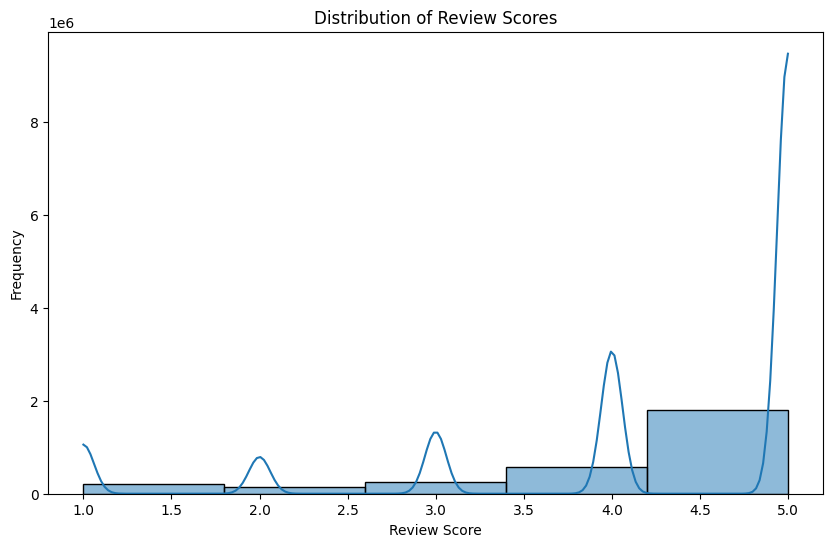

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['review/score'], bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:


# Top 10 most reviewed books
top_books = df.group_by("Title").agg(pl.count().alias("review_count")).sort("review_count", descending=True).head(10)
print(top_books)

/tmp/ipython-input-25-930861292.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  top_books = df.group_by("Title").agg(pl.count().alias("review_count")).sort("review_count", descending=True).head(10)


shape: (10, 2)
┌─────────────────────────────────┬──────────────┐
│ Title                           ┆ review_count │
│ ---                             ┆ ---          │
│ str                             ┆ u32          │
╞═════════════════════════════════╪══════════════╡
│ The Hobbit                      ┆ 22023        │
│ Pride and Prejudice             ┆ 20371        │
│ Atlas Shrugged                  ┆ 12513        │
│ Wuthering Heights               ┆ 10780        │
│ The Giver                       ┆ 7644         │
│ Great Expectations              ┆ 7421         │
│ Harry Potter and The Sorcerer'… ┆ 6796         │
│ Of Mice and Men                 ┆ 6728         │
│ Brave New World                 ┆ 6312         │
│ Mere Christianity               ┆ 6053         │
└─────────────────────────────────┴──────────────┘


Average review trend

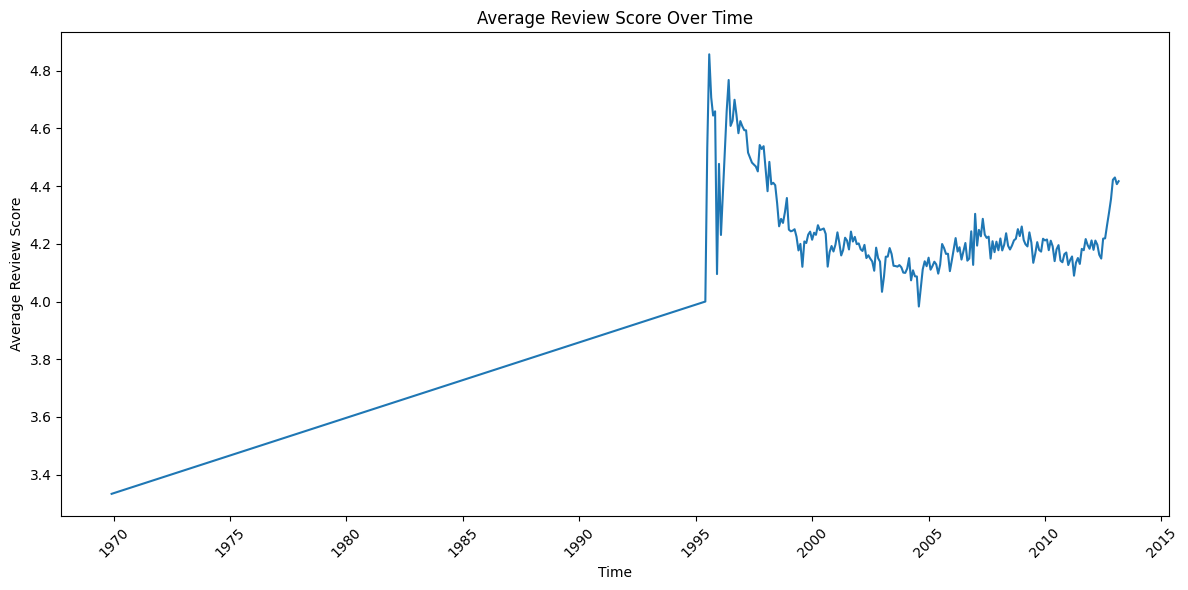

In [ ]:
# Convert review/time to datetime
df = df.with_columns(pl.from_epoch(pl.col("review/time")).cast(pl.Datetime).alias("review_datetime"))

# Group by month and calculate the average review score
monthly_avg_score = df.group_by(pl.col("review_datetime").dt.truncate("1mo")).agg(pl.mean("review/score").alias("average_score")).sort("review_datetime")

#  average review score over time plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_score["review_datetime"], monthly_avg_score["average_score"])
plt.title('Average Review Score Over Time')
plt.xlabel('Time')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rating distribution

/tmp/ipython-input-27-2852197680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["review/score"].to_numpy(),palette="viridis")


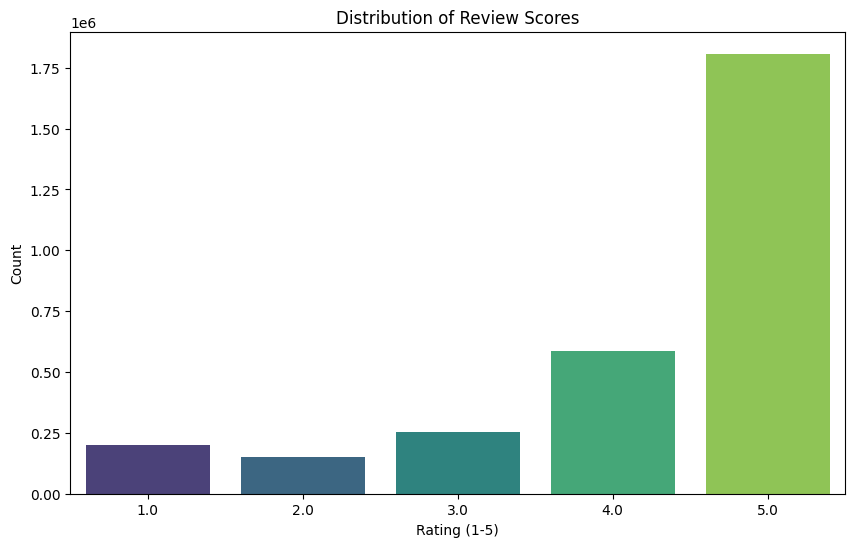

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df["review/score"].to_numpy(),palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Rating (1-5)")
plt.ylabel('Count')
plt.show()


Review length

In [ ]:
#add review length column
df=df.with_columns(
    pl.col("review/text").str.len().alias("review_length"))

AttributeError: 'ExprStringNameSpace' object has no attribute 'len'